# Questão 1

Letra (A): Sigma_8 tem o valor de 0.696


/tmp/ipykernel_199487/450441839.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return num/den
/tmp/ipykernel_199487/450441839.py:23: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  variancia=quad(integrando, 0, np.inf, args=r, limit=1000, epsabs=1e-8, epsrel=1e-6)[0]


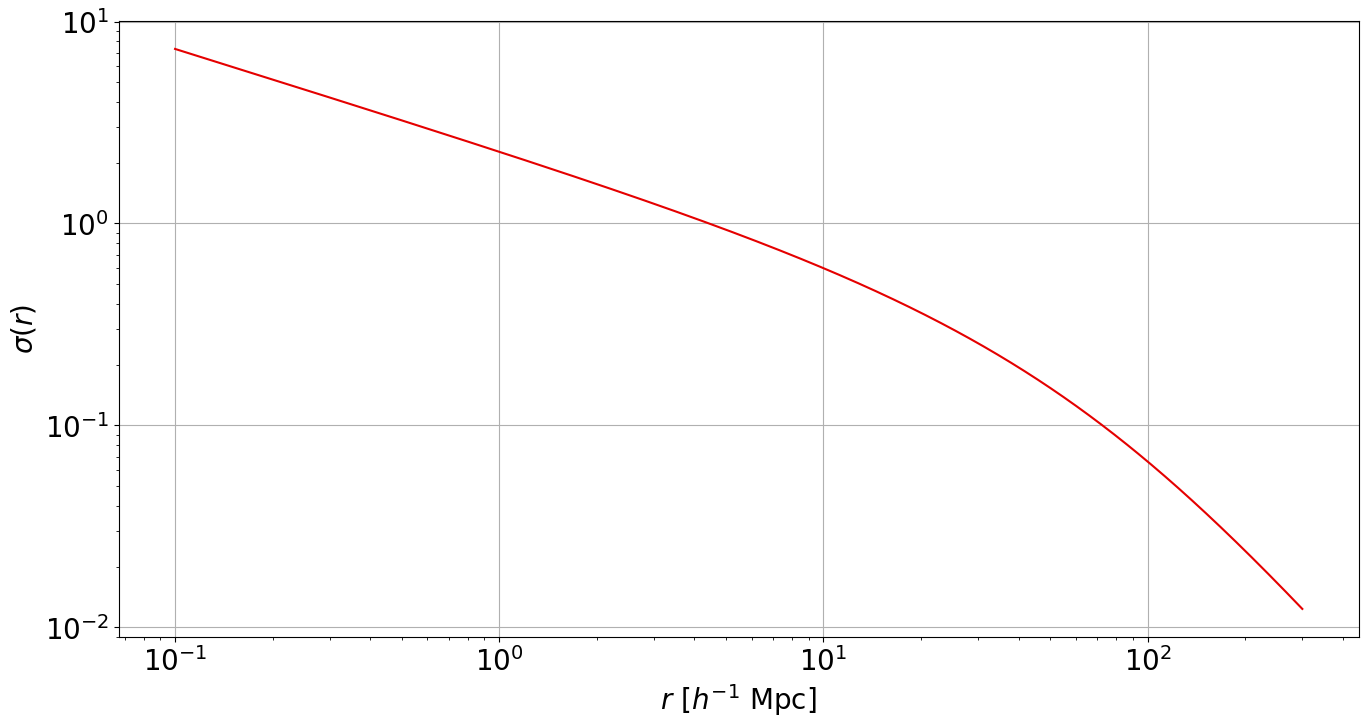

In [3]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

# Letra (A)

a=3.4e6
km=0.0255

def potencia (k): 
    elevado_na_menos_dois=(1+(k/km)**(1.5))
    return a*k*elevado_na_menos_dois**(-2)

def janela(k,r): 
    x = k*r
    den=x**3
    num=3*(np.sin(x) -x*np.cos(x))
    return num/den

def calcula_variancia(r):
    def integrando(k,r): return potencia(k)*(janela(k,r)**2)*(k**2)
    variancia=quad(integrando, 0, np.inf, args=r, limit=1000, epsabs=1e-8, epsrel=1e-6)[0]
    variancia=(1/(2*np.pi**2))*variancia
    return np.sqrt(variancia)

print(f"Letra (A): Sigma_8 tem o valor de {calcula_variancia(8):.3f}")

rs=np.arange(0,300,0.1)
variancias=[]
for r in rs: variancias.append(calcula_variancia(r))

fig=plt.figure(figsize=[16,8])
plt.plot(rs,variancias, color='xkcd:red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ [$h^{-1}$ Mpc]', size=20)
plt.ylabel(r'$\sigma(r)$', size=20)
plt.grid()
plt.savefig('varianciaXraio.png', dpi=300, facecolor='w', edgecolor='w', bbox_inches='tight')

In [22]:
# Letra (B)
rho_crit=2.77e11
omega_m=0.3
rho_bar=omega_m*rho_crit

delta_c=1.686

def massa_para_raio(m): return (np.array(m)/((4/3)*np.pi*rho_bar))**(1/3)

def dist(m):
    constantes=np.sqrt(2/np.pi)*rho_bar*delta_c/m
    raio_correspondente=massa_para_raio(m)
    variancia=calcula_variancia(raio_correspondente)
    primeiro_termo=constantes/variancia
    segundo_termo=np.exp((-1*delta_c**2)/(2*variancia**2))
    m_low, m_high=m*0.99, m*1.01
    r_low, r_high=massa_para_raio(m_low), massa_para_raio(m_high)
    lnsigma_low, lnsigma_high= np.log(calcula_variancia(r_low)), np.log(calcula_variancia(r_high))
    dlnsigma_dm= (lnsigma_high-lnsigma_low)/(m_high-m_low)
    return primeiro_termo*segundo_termo*np.abs(dlnsigma_dm)


limite=[1e13, 1e14, 1e15, 1e16]
numeros=[]
for lim in limite: numeros.append(quad(dist, lim,1e18)[0])
volume=4/3*np.pi*(300)**3
print(f"Letra (B): N(M) para log(M)=13,14,15,16 é, respectivamente, {numeros[0]:.3e}, {numeros[1]:.3e}, {numeros[2]:.3e}, {numeros[3]:.3e} o que corresponde a {numeros[0]*volume:.3e}, {numeros[1]*volume:.3e}, {numeros[2]*volume:.3e}, {numeros[3]*volume:.3e}")



Letra (B): N(M) para log(M)=13,14,15,16 é, respectivamente, 5.320e-04, 1.526e-05, 4.303e-09, 1.053e-16 o que corresponde a 6.017e+04, 1.726e+03, 4.867e-01, 1.191e-08


# Questão 2

Letra (A): A velocidade angular na corrotação é 2.190e+01 km/s/kpc e as ressonâncias de Lindblad acontecem em 0.161, 1.812 e 17.526 kpc


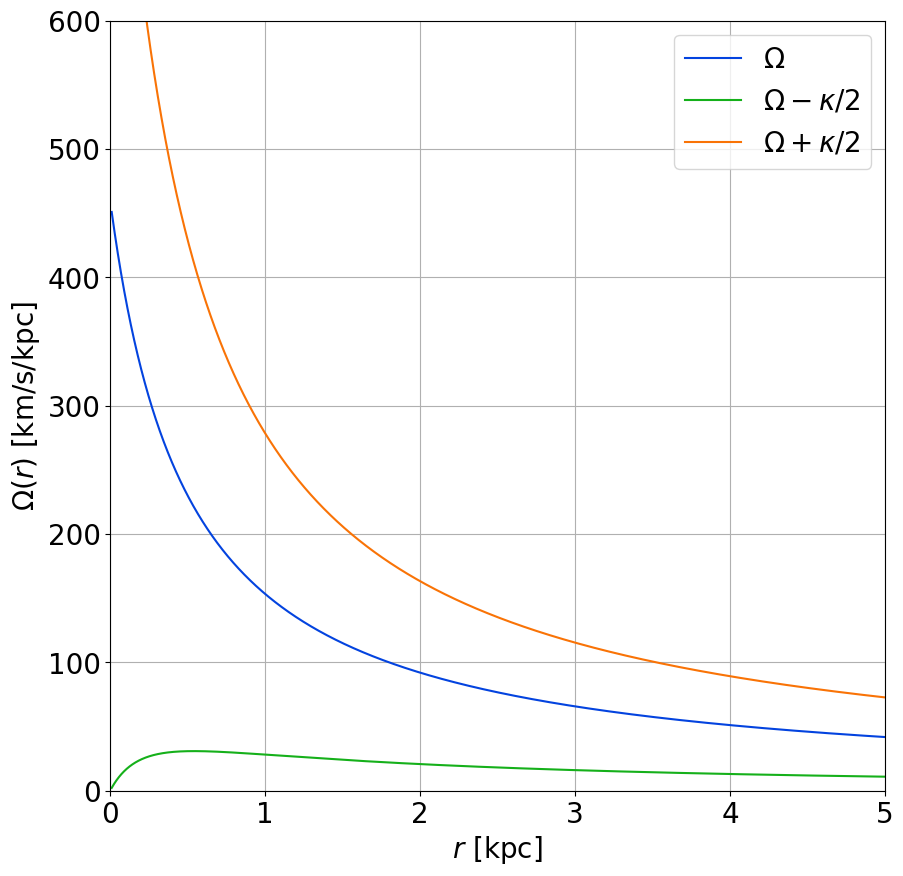

In [23]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

# Letra (A)

vc=230 #km/s
rd= 0.5 #kpc
rrot= 10 #kpc


def velocidade_angular(r): return (vc/(r+rd))

def epiciclo(r):
    r_low, r_high=r*0.99, r*1.01
    v_low, v_high=velocidade_angular(r_low)**2, velocidade_angular(r_high)**2
    derivada= (v_high-v_low)/(r_high-r_low)
    epiciclo_ao_quadrado=r*derivada +4*velocidade_angular(r)**2
    return np.sqrt(epiciclo_ao_quadrado)

rs = np.arange(0.01,32, 0.0001)
v_corrot=velocidade_angular(rrot)
lindblad=[]
rotacao=[]
lindbladmais=[]
lindbladmenos=[]
for r in rs: 
    epi=epiciclo(r)
    v_angular=velocidade_angular(r)
    rotacao.append(v_angular)
    dif=v_corrot-v_angular
    m=2
    lindbladmais.append(v_angular+epi/m)
    lindbladmenos.append(v_angular-epi/2)
    if(abs(epi-m*dif) < 0.0001 or abs(epi+m*dif) < 0.001):lindblad.append(r) 
    
print(f"Letra (A): A velocidade angular na corrotação é {velocidade_angular(rrot):.3e} km/s/kpc e as ressonâncias de Lindblad acontecem em {lindblad[0]:.3f}, {lindblad[1]:.3f} e {lindblad[2]:.3f} kpc")
# Letra (B)
fig=plt.figure(figsize=[10,10])
plt.plot(rs, rotacao, color='xkcd:blue', label=r'$\Omega$')
plt.plot(rs, lindbladmenos, color='xkcd:green', label=r'$\Omega - \kappa/2$')
plt.plot(rs, lindbladmais, color='xkcd:orange', label=r'$\Omega + \kappa/2$')
plt.xlim([0, 5])
plt.ylim([0,600])
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20)
plt.xlabel(r'$r$ [kpc]', size=20)
plt.ylabel(r'$\Omega(r)$ [km/s/kpc]', size=20)
plt.grid()
plt.show()

# Questão 3 

In [24]:
lum=1e45 #erg/s
lum=lum*1e-7
eta=0.17
solar_mass=1.989e30
gas =1e7


mponto=lum/(eta*sc.c**2)
mponto=mponto/solar_mass
tempo=(gas/mponto)/(365*24*60*60)
print(f"Letra (A): A fase desse AGN deve durar {tempo:3e} anos")

Letra (A): A fase desse AGN deve durar 9.636482e+07 anos


/tmp/ipykernel_199487/1733571434.py:21: RuntimeWarning: overflow encountered in exp
  dois=(ni**3)/(np.exp(sc.h*ni/(sc.k*T)) - 1)
/tmp/ipykernel_199487/1733571434.py:29: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(integrando, rmin, rmin*(10**4))[0]
/tmp/ipykernel_199487/1733571434.py:29: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(integ

3.084089e+12,3.084086e+12,6.168159e+11


AttributeError: module 'matplotlib.pyplot' has no attribute 'sace'

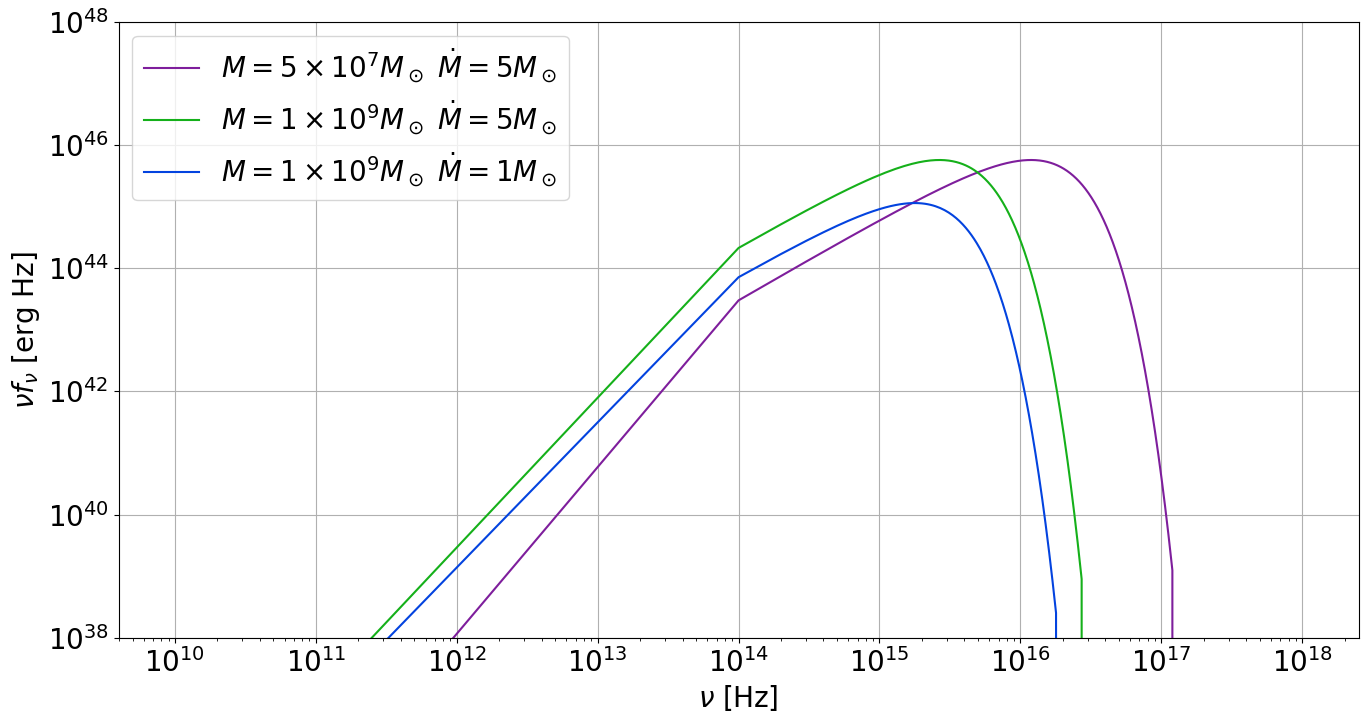

In [ ]:
solar_mass=1.989e30

mbn=np.array([5e7,1e9, 1e9])
mponto=np.array([5,5,1])
rmin=np.array(6*sc.G*mbn*solar_mass/(sc.c**2))


def t(r, m, mp, rmin):
    m=m*solar_mass #kg
    mp=mp*solar_mass/(365*24*60*60) #kg/s

    t1=3*sc.G*m*mp
    t1=t1/(8*sc.pi*sc.sigma*(rmin**3))
    t1=t1**(1/4)

    fator=r/rmin
    return t1*(fator**(-0.75))*(1-(fator**(-0.5)))**(0.25)

def planckiana (ni, T):
    um=(2*sc.h)/sc.c**2
    dois=(ni**3)/(np.exp(sc.h*ni/(sc.k*T)) - 1)
    return um*dois

def luminosidade(ni, m, mp, rmin):
    def integrando (r): 
        temp=t(r,m,mp, rmin)
        fluxo=planckiana(ni, temp)    
        return sc.pi*fluxo*2*sc.pi*r
    return quad(integrando, rmin, rmin*(10**4))[0]

def luminosidade_sol(ni, m, mp, rmin):
    def integrando (r): 
        temp=t(r,m,mp, rmin)
        fluxo=planckiana(ni, temp)    
        return sc.pi*fluxo*2*sc.pi*r
    return quad(integrando, rmin, rmin*(10**4))[0]/3.828e26


ni=np.linspace(10**10, 10**18, 10000)
um=[]
dois=[]
tres=[]

for n in ni:
    um.append(n*luminosidade(n, mbn[0], mponto[0], rmin[0])*10**7)
    dois.append(n*luminosidade(n, mbn[1], mponto[1], rmin[1])*10**7)
    tres.append(n*luminosidade(n, mbn[2], mponto[2], rmin[2])*10**7)

l1= quad(luminosidade_sol,1e12, 1e18,(mbn[0], mponto[0], rmin[0]))[0]
l2= quad(luminosidade_sol,1e12, 1e18,(mbn[1], mponto[1], rmin[1]))[0]
l3= quad(luminosidade_sol,1e12, 1e18,(mbn[2], mponto[2], rmin[2]))[0]
print(f"{l1:3e},{l2:3e},{l3:3e}")


fig=plt.figure(figsize=[16,8])
plt.plot(ni, um, label=r'$M=5\times10^7M_\odot$ $\dot{M}=5M_\odot$', color='xkcd:purple')
plt.plot(ni, dois,  label=r'$M=1\times10^9M_\odot$ $\dot{M}=5M_\odot$', color='xkcd:green')
plt.plot(ni, tres, label=r'$M=1\times10^9M_\odot$ $\dot{M}=1M_\odot$', color='xkcd:blue')
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim([1e38, 1e48])
plt.xlabel(r'$\nu$ [Hz]', size=20)
plt.ylabel(r'$\nu f_\nu$ [erg Hz]', size=20)
plt.grid()
plt.legend(fontsize=20)
plt.show()


